# Machine Learning Lab 04: Multinomial Logistic Regression


## Generalized Linear Models

From lecture, we know that members of the exponential family distributions can be written in the form
$$p(y;\eta) = b(y)e^{(\eta^\top T(y)-a(\eta))},$$
where
- $\eta$ is the natural parameter or canonical paramter of the distribution,
- $T(y)$ is the sufficient statistic (we normally use $T(y) = y$),
- $b(y)$ is an arbitrary scalar function of y, and
- $a(\eta)$ is the log partition function. We use $e^{a(\eta)}$ just to normalize the distribution to have a sum or integral of 1.

Each choice of $T$, $a$, and $b$ defines a family (set) of distributions parameterized by $\eta$.

If we can write $p(y \mid \mathbf{x} ; \theta)$ as a member of the exponential family of distributions with parameters $\mathbf{\eta}$ with
$\eta_i = \theta^\top_i \mathbf{x}$, we obtain a *generalized linear model* that can be optimized using the maximum likelihood principle.

The GLM for the Gaussian distribution with natural parameter $\eta$ being the mean of the Gaussian gives us ordinary linear regression.

The Bernoulli distribution with parameter $\phi$ can be written as an exponential distribution
with natural parmeter $\eta = \log \frac{\phi}{1-\phi}$. The GLM for this distribution is logistic regression.

When we write the multinomial distribution with paremeters $\phi_i > 0$ for classes $i \in 1..K$ with the constraint that
$$\sum_{i=1}^{K} \phi_i = 1$$ as a member of the exponential family,
the resulting GLM is called *multinomial logistic regression*. The parameters $\phi_1, \ldots, \phi_K$ are written
in terms of $\theta$ as
$$\phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$

## Optimizing a Multinomial Regression Model

In multinomial regression, we have

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$

We need a cost function and a way to minimize that cost function. As usual, we try to find the parameters maximizing the likelihood or log likelihood function, or equivalently, minimizing the negative log likelihood function:

$$\theta^* = \text{argmax}_\theta {\cal L}(\theta) =
             \text{argmax}_\theta \ell(\theta) =
             \text{argmin}_\theta J(\theta),$$
where
$$\begin{eqnarray}
   J(\theta) & = & - \ell(\theta) \\
   & = & - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)} ; \theta).
   \end{eqnarray}$$

Now that we know what is $J(\theta)$, let's try to find its minimimum by taking the derivatives with respect to an arbitrary parameter $\theta_{kl}$, the $l$-th element of the parameter vector $\theta_k$ for class $k$. Before we start, let's define a variable $a_k$ as the linear activation for class $k$ in the softmax function:
$$ a_k = \theta_k^\top \mathbf{x}^{(i)}, $$
and rewrite the softmax more conveniently as
$$ \phi_k = \frac{e^{a_k}}{\sum_{j=1}^K e^{a_j}}. $$
That makes it a little easier to compute the gradient:
$$\begin{eqnarray}
   \frac{\partial J}{\partial \theta_{kl}} & = & - \sum_{i=1}^m \frac{1}{\phi_{y^{(i)}}} \frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}}. \\
   \end{eqnarray}$$
Using the chain rule, we have
$$\frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}} = \sum_{j=1}^K \frac{\partial \phi_{y^{(i)}}}{\partial a_j} \frac{\partial a_j}{\partial \theta_{kl}}$$
The second factor is easy:
$$ \frac{\partial a_j}{\partial \theta_{kl}} = \delta(k=j)x^{(i)}_l. $$
For the first factor, we have
$$\begin{eqnarray}
\frac{\partial \phi_{y^{(i)}}}{\partial a_j}
& = & \frac{ \left[ \delta(y^{(i)}=j)e^{a_j} \sum_{c=1}^K e^{a_c} \right] - e^{a_j} e^{a_j} }{\left[ \sum_{c=1}^K e^{a_c} \right]^2} \\
& = & \delta(y^{(i)}=j) \phi_j - \phi_j^2
\end{eqnarray}$$

Substituting what we've derived into the definition above, we obtain
$$ \frac{\partial J}{\theta_{kl}} = - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}}. $$

There are two ways to do the calculation.
In deep neural networks with multinomial outputs, we want to first calculate the $\frac{\partial J}{\partial a_j}$ terms then use them to calculate $\frac{\partial J}{\partial \theta_{kl}}$.

However, if we only have the "single layer" model described up till now, we note
that
$$\frac{\partial a_j}{\partial \theta_{kl}} = \delta(j=k) x^{(i)}_l,$$
so we can simplify as follows:
$$\begin{eqnarray}
  \frac{\partial J}{\theta_{kl}} & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}} \\
  & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \delta(j=k) x^{(i)}_l \\
  & = & - \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l \\
  \end{eqnarray}$$

## Put It Together

OK! Now we have all 4 criteria for our multinomial regression model:

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$
    
3. The cost function is
   $$J(\theta) = - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)})$$
   
4. The optimization algorithm is gradient descent on $J(\theta)$ with the update rule
   $$\theta_{kl}^{(n+1)} \leftarrow \theta_{kl}^{(n)} - \alpha \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l.$$


## Multinomial Regression Example

The following example of multinomial logistic regression is from [Kaggle](https://www.kaggle.com/saksham219/softmax-regression-for-iris-classification).

The data set is the famous [Iris dataset from the UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/iris).

The data contain 50 samples from each of three classes. Each class refers to a particular species of the iris plant. 
The data include four independent variables:
1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm

The target takes on one of three classes:
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica
   
To predict the target value, we use multinomial logistic regression for $k=3$ classes i.e. $y \in \{ 1, 2, 3 \}$. 

Given $\mathbf{x}$, we would like to predict a probability distribution over the
three outcomes for $y$, i.e., $\phi_1 = p(y=1 \mid \mathbf{x})$, $\phi_2 = p(y=2 \mid \mathbf{x})$, and $\phi_3 = p(y=3 \mid \mathbf{x})$.


In [1]:
# importing libraries
import numpy as np
import pandas as pd 
import random
import math

The `phi` function returns $\phi_i$ for input patterns $\mathtt{X}$ and parameters $\theta$.

In [2]:
def phi(i, theta, X, num_class):
    """
    Here is how to make documentation for your function show up in intellisense.
    Explanation you put here will be shown when you use it.
    
    To get intellisense in your Jupyter notebook:
        - Press 'TAB' after typing a dot (.) to see methods and attributes
        - Press 'Shift+TAB' after typing a function name to see its documentation

    The `phi` function returns phi_i = h_theta(x) for input patterns X and parameters theta.
    
    Inputs:
        i=index of phi
        
        X=input dataset
        
        theta=parameters

    Returns:
        phi_i
    """
    mat_theta = np.matrix(theta[i])
    mat_x = np.matrix(X)
    num = math.exp(np.dot(mat_theta, mat_x.T))
    den = 0
    for j in range(0,num_class):
        mat_theta_j = np.matrix(theta[j])
        den = den + math.exp(np.dot(mat_theta_j, mat_x.T))
    phi_i = num / den
    return phi_i

**Tips for using intellisense: Shift+TAB**

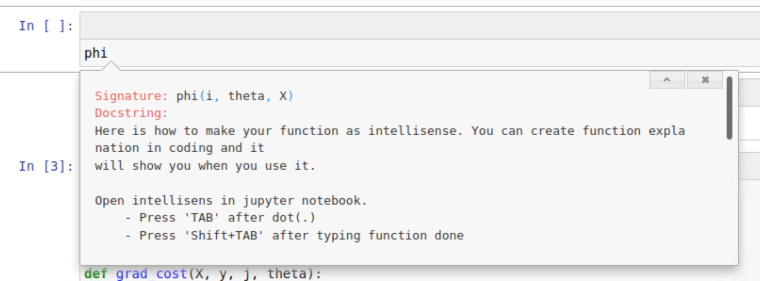

The `grad_cost` function gives the gradient of the cost for data $\mathtt{X}, \mathbf{y}$ for class $j\in 1..k$.

In [3]:
def indicator(i, j):
    '''
    Check whether i is equal to j
    
    Return:
        1 when i=j, otherwise 0
    '''
    if i == j: return 1
    else: return 0


def grad_cost(X, y, j, theta, num_class):
    '''
    Compute the gradient of the cost function for data X, y for parameters of
    output for class j in 1..k
    '''
    m, n = X.shape
    sum = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta, X.loc[i], num_class)
        sum = sum + (X.loc[i] * p)
    grad = -sum / m
    return grad

def gradient_descent(X, y, theta, alpha, iters, num_class):
    '''
    Perform iters iterations of gradient descent: theta_new = theta_old - alpha * cost
    '''
    n = X.shape[1]
    for iter in range(iters):
        dtheta = np.zeros((num_class, n))
        for j in range(0, num_class):
            dtheta[j,:] = grad_cost(X, y, j, theta, num_class)
        theta = theta - alpha * dtheta
    return theta

def h(X, theta, num_class):
    '''
    Hypothesis function: h_theta(X) = theta * X
    '''
    X = np.matrix(X)
    h_matrix = np.empty((num_class,1))
    den = 0
    for j in range(0, num_class):
        den = den + math.exp(np.dot(theta[j], X.T))
    for i in range(0,num_class):
        h_matrix[i] = math.exp(np.dot(theta[i], X.T))
    h_matrix = h_matrix / den
    return h_matrix

## Exercise 1.1 (5 points)

Create a function to load **data** from **Iris.csv** using the Pandas library and extract y from the data.

You can use [the Pandas 10 minute guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) to learn how to use pandas.

In [4]:
def load_data(file_name, drop_label, y_label, is_print=False):
    # 1. Load csv file
    data = pd.read_csv(file_name)
    if is_print:
        print(data.head())
    # 2. remove 'Id' column from data
    if drop_label is not None:
        data = data.drop([drop_label],axis=1)
        if is_print:
            print(data.head())
    # 3. Extract y_label column as y from data
    y = None
    # 4. get index of y-column
    y_index = data.columns.get_loc(y_label)
    # 5. Extrack X features from data
    X = None
    
    # YOUR CODE HERE
    y = data[y_label]
    X = data.drop(columns = y_label)
    
    return X, y

In [5]:
X, y = load_data('Iris.csv', 'Id', 'Species', True)
print(X.head())
print(y[:5])

# Test function: Do not remove
# tips: this is how to create dataset using pandas
d_ex = {'ID':     [  1,   2,   3,    4,    5,    6,    7],
        'Grade':  [3.5, 2.5, 3.0, 3.75, 2.83, 3.95, 2.68],
        'Type':   ['A', 'B', 'C',  'A',  'C',  'A',  'B']
        }
df = pd.DataFrame (d_ex, columns = ['ID','Grade', 'Type'])
df.to_csv('out.csv', index=False)

Xtest, ytest = load_data('out.csv', 'ID', 'Type')
assert len(Xtest.columns) == 1, 'number of X_columns incorrect (1)'
assert ytest.name == 'Type', 'Extract y_column is incorrect (1)'
assert ytest.shape == (7,), 'number of y is incorrect (1)'
assert 'Grade' in Xtest.columns, 'Incorrect columns in X (1)'
Xtest, ytest = load_data('out.csv', None, 'Type')
assert len(Xtest.columns) == 2, 'number of X_columns incorrect (2)'
assert ytest.name == 'Type', 'Extract y_column is incorrect (2)'
assert ytest.shape == (7,), 'number of y is incorrect (2)'
assert 'Grade' in Xtest.columns and 'ID' in Xtest.columns, 'Incorrect columns in X (2)'
import os
os.remove('out.csv')

assert len(X.columns) == 4, 'number of X_columns incorrect (3)'
assert 'SepalWidthCm' in X.columns and 'Id' not in X.columns and 'Species' not in X.columns, 'Incorrect columns in X (3)'
assert y.name == 'Species', 'Extract y_column is incorrect (3)'
assert y.shape == (150,), 'number of y is incorrect (3)'

print("success!")
# End Test function

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5          

**Expected result**: \
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm \
0            5.1           3.5            1.4           0.2\
1            4.9           3.0            1.4           0.2\
2            4.7           3.2            1.3           0.2\
3            4.6           3.1            1.5           0.2\
4            5.0           3.6            1.4           0.2\
0    Iris-setosa\
1    Iris-setosa\
2    Iris-setosa\
3    Iris-setosa\
4    Iris-setosa\
Name: Species, dtype: object

## Exercise 1.2 (10 points)

Partition data into training and test sets
- No need to use random.seed function!
- Ensure that the train set is 70% and the test set is 30% of the data.
- Encode the labels in the y attribute to be integers in the range 0..k-1.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use the <tt>partition</tt> function from lab02 if you like
    <p></p>
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html">panda.iloc</a> must be used to extract data from an index list
    <p></p>
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.unique.html">panda.unique</a> will give you the set of unique labels
</details>

In [6]:
def partition(X, y, percent_train):
    # 1. create index list
    # 2. shuffle index
    # 3. Create train/test index
    # 4. Separate X_Train, y_train, X_test, y_test
    # 5. Get y_labels_name from y using pandas.unique function
    # 6. Change y_labels_name into string number and put into y_labels_new
    # 7. Drop shuffle index columns
    #     - pandas.reset_index() and pandas.drop(...) might be help
    
    y_labels_name = None
    y_labels_new = None
    
    # YOUR CODE HERE
    
    y_labels_name = y.unique()
#     y_labels_new = [str(i) for i in range(len(y_labels_name))]
    y_labels_new = list(np.arange(len(y_labels_name)))
    
    y.replace(to_replace = y_labels_name, value = y_labels_new, inplace = True)
    
    random.seed(32)
    idx = np.arange(0, X.shape[0])
    random.shuffle(idx)
    train_size = int(len(idx)*percent_train)
    idx_train = idx[0:train_size]
    idx_test = idx[train_size:]
    X_train = X.iloc[idx_train, :].reset_index(drop=True)
    X_test = X.iloc[idx_test, :].reset_index(drop=True)
    y_train = y.iloc[idx_train].reset_index(drop=True)
    y_test = y.iloc[idx_test].reset_index(drop=True)
    
    return idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new

In [7]:
percent_train = 0.7
idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new = partition(X, y, percent_train)
print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)
print('y_labels_name: ', y_labels_name)
print('y_labels_new: ', y_labels_new)
print(X_train.head())
print(y_train.head())

# Test function: Do not remove
assert len(y_labels_name) == 3 and len(y_labels_new) == 3, 'number of y uniques are incorrect'
assert X_train.shape == (105, 4), 'Size of X_train is incorrect'
assert X_test.shape == (45, 4), 'Size of x_test is incorrect'
assert y_train.shape == (105, ), 'Size of y_train is incorrect'
assert y_test.shape == (45, ), 'Size of y_test is incorrect'
assert 'Iris-setosa' in y_labels_name and 'Iris-virginica' in y_labels_name and \
        'Iris-versicolor' in y_labels_name, 'y unique data incorrect'
assert min(y_labels_new) == 0 and max(y_labels_new) < 3, 'label indices are incorrect'

print("success!")
# End Test function

X_train.shape (105, 4)
X_test.shape (45, 4)
y_train.shape (105,)
y_test.shape (45,)
y_labels_name:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
y_labels_new:  [0, 1, 2]
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            4.6           3.1            1.5           0.2
1            4.9           2.5            4.5           1.7
2            7.6           3.0            6.6           2.1
3            4.9           3.1            1.5           0.1
4            6.5           3.0            5.8           2.2
0    0
1    2
2    2
3    0
4    2
Name: Species, dtype: int64
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
X_train.shape (105, 4)\
X_test.shape (45, 4)\
y_train.shape (105,)\
y_test.shape (45,)\
y_labels_name:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] \
y_labels_new:  [0, 1, 2]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm\
0            6.4           2.8            5.6           2.2\
1            6.7           3.3            5.7           2.1\
2            4.6           3.4            1.4           0.3\
3            5.1           3.8            1.5           0.3\
4            5.0           2.3            3.3           1.0\
   Species\
0        2\
1        2\
2        0\
3        0\
4        1

## Exercise 1.3 (5 points)

Train your classification model using the `gradient_descent` function already provided.
You might also play around with the gradient descent function to see if you can speed it up!

In [8]:
# num_class is the number of unique labels
num_class = len(y_labels_name)

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)

# Reset m and n for training data
r, c = X_train.shape

# Initialize theta for each class
theta_initial = np.ones((num_class, c))

alpha = .05
iterations = 200

theta = None
# Logistic regression
# YOUR CODE HERE

theta = gradient_descent(X_train, y_train, theta_initial, alpha, iterations, num_class)

In [9]:
print(theta)
print(theta.shape)

# Test function: Do not remove
assert theta.shape == (3, 5), 'Size of theta is incorrect'

print("success!")
# End Test function

[[ 1.17405358  1.31940061  1.82712594 -0.19490446  0.44620956]
 [ 1.05438638  1.23661243  0.67880534  1.16051272  0.75780868]
 [ 0.77156004  0.44398697  0.49406872  2.03439174  1.79598176]]
(3, 5)
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
[[ 1.17632192  1.32360047  1.83204165 -0.20224445  0.44039155]\
 [ 1.10140069  1.13537321  0.74833178  1.21907866  0.82567377]\
 [ 0.72227738  0.54102632  0.41962657  1.98316579  1.73393467]]\
\
(3, 5)

## Exercise 1.4 (5 points)

Let's get your model to make predictions on the test data.

In [10]:
# Prediction on test data 

if (X_test.shape[1] == X.shape[1]): 
    X_test.insert(0, "intercept", 1)

# Reset m and n for test data
r,c = X_test.shape

y_pred = []
for index,row in X_test.iterrows(): # get a row of X_test data
    # calculate y_hat using hypothesis function
    y_hat = None
    # find the index (integer value) of maximum value in y_hat and input back to prediction
    prediction = None
    # YOUR CODE HERE
    y_hat = h(row, theta, num_class)
#     print(y_hat)
    prediction = list(y_hat).index(max(y_hat))
    # collect the result
    y_pred.append(prediction)

In [11]:
print(len(y_pred))
print(y_pred[:7])
print(type(y_pred[0]))

# Test function: Do not remove
assert len(y_pred) == 45, 'Size of y_pred is incorrect'
assert isinstance(y_pred[0], int) and isinstance(y_pred[15], int) and isinstance(y_pred[17], int), 'prediction type is incorrect'
assert max(y_pred) < 3 and min(y_pred) >= 0, 'wrong index of y_pred'

print("success!")
# End Test function

45
[1, 2, 0, 1, 2, 0, 0]
<class 'int'>
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
45 \
[2, 0, 2, 0, 0, 0, 2] \
<class 'int'>

## Exercise 1.5 (5 points)

Estimate accuracy of model on test data

$$\text{accuracy} = \frac{\text{number of correct test predictions}}{m_{\text{test}}}$$

In [12]:
def calc_accuracy(y_test, y_pred):
    accuracy = None
    # YOUR CODE HERE
    num_correct_pred = (np.array(y_test) == np.array(y_pred)).astype(int).sum()
    m_test = len(y_test)
    accuracy = num_correct_pred / m_test
    return accuracy

In [13]:
accuracy = calc_accuracy(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)

# Test function: Do not remove
assert isinstance(accuracy, float), 'accuracy should be floating point'
assert accuracy >= 0.8, 'Did you train the data?'

print("success!")
# End Test function

Accuracy: 0.9556
success!


**Expected result**: should be at least 0.8!

## On your own in lab

We will do the following in lab:
1. Write a function to obtain the cost for particular $\mathtt{X}$, $\mathbf{y}$, and $\theta$.
2. Plot the training set and test cost as training goes on and find the best value for the number of iterations and learning rate.
3. Make 2D scatter plots showing the predicted and actual class of each item in the training set, plotting two features at a time.
   Comment on the cause of the errors you observe. If you obtain perfect test set accuracy, re-run the train/test split
   and rerun the optimization until you observe some mistaken predictions on the test set.


## Exercise 2.1 (15 points)

1. Write a function to obtain the cost for particular $\mathtt{X}$, $\mathbf{y}$, and $\theta$.
   Name your function `my_J()` and implement

$$ J_j = -\delta(y, j)\log{\phi_j} $$


In [14]:
def my_J(theta, X, y, j, num_class):
    #computing J for a particular class only, here class is j, if j=0, then for class y=0, j=1, then for class y=1
    #cost of a class i is cumulated only if the train set is of the same class j, otherwise it's just ignored, mathematically-delta(y,j)-does this filtering
    cost = None
    # YOUR CODE HERE
    print(X.shape,y.shape)
    delta = indicator(y,j)
    phi_j = phi(j, theta, X, num_class)
    cost = - delta * np.log(phi_j)

#     delta_j = (y == j).astype(int) #shape of y (m,)
#     print('delta shape',delta_j.shape)
#     phi_j = np.squeeze(np.exp(X @ theta[j,:].reshape(-1,1))) / np.sum(np.exp(X @ theta.reshape(-1,num_class)), axis=1) #shape of (m,)
#     print('phi shape',phi_j.shape)
#     cost_j = - np.dot(delta_j, np.log(phi_j)) #scalar
#     cost = cost_j
#     print(delta_j)
    return cost

In [15]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
cost = my_J(test_theta, X_train.loc[10], y_train[10], 0, 3)
assert isinstance(cost, float), 'cost should be floating point'

print("success!")
# End Test function

(5,) ()
success!


2. Implement <code>my_grad_cost</code> using your <code>my_J</code> function

In [16]:
def my_J(theta, X, y, j, num_class):
    #computing J for a particular class only, here class is j, if j=0, then for class y=0, j=1, then for class y=1
    #cost of a class i is cumulated only if the train set is of the same class j, otherwise it's just ignored, mathematically-delta(y,j)-does this filtering
    cost = None
    delta_j = (y == j).astype(int) #shape of y (m,)
#     print('delta shape',delta_j.shape)
    phi_j = np.squeeze(np.exp(X @ theta[j,:].reshape(-1,1))) / np.sum(np.exp(X @ theta.reshape(-1,num_class)), axis=1) #shape of (m,)
#     print('phi shape',phi_j.shape)
    cost_j = - np.dot(delta_j, np.log(phi_j)) #scalar
    cost = cost_j
#     print(delta_j)
    return cost

def my_grad_cost(X, y, j, theta, num_class):
    #grad_cost for a particular class j, here class is represented by j
    #theta[j]= shape(n,)
    grad = None
    cost = None
    # YOUR CODE HERE
    cost = my_J(theta, X, y, j, num_class)
    
    delta_j = (y == j).astype(int)
#     print('delta',delta_j.shape)
    phi_j = np.squeeze(np.exp(X @ theta[j].reshape(-1,1))) / np.sum(np.exp(X @ theta.reshape(-1,num_class)), axis=1) #shape of (m,)
#     print('phi_j\n', max(phi_j))
#     print((phi_j - delta_j))
    grad = (phi_j - delta_j) @ X / X.shape[0]  # ycalculated - y_truth, and its averaged over training size
#     print(grad.shape)
    return grad, cost

In [17]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
grad, cost = my_grad_cost(X_train, y_train, 0, test_theta, num_class)
print(grad)
print(cost)
assert isinstance(cost, float), 'cost should be floating point'
assert isinstance(grad['intercept'], float) and \
        isinstance(grad['SepalLengthCm'], float) and \
        isinstance(grad['SepalWidthCm'], float) and \
        isinstance(grad['PetalLengthCm'], float) and \
        isinstance(grad['PetalWidthCm'], float) , 'grad should be floating point'
print("success!")
# End Test function

intercept        0.019048
SepalLengthCm    0.385079
SepalWidthCm    -0.051746
PetalLengthCm    0.811111
PetalWidthCm     0.336508
dtype: float64
36.25420552604762
success!


**Expect result**: <span style="color:blue">(*or similar*)</span>\
intercept        0.009524\
SepalLengthCm    0.316825\
SepalWidthCm    -0.091429\
PetalLengthCm    0.780000\
PetalWidthCm     0.329524\
dtype: float64\
37.352817814715735

3. Implement <code>my_gradient_descent</code> using your <code>my_grad_cost</code> function

In [18]:
def my_gradient_descent(X, y, theta, alpha, iters, num_class):        
    cost_arr = []
    # YOUR CODE HERE
    for i in range(iters):
        cum_cost = 0
        for j in range(num_class):
            grad, cost = my_grad_cost(X, y, j, theta, num_class)
            theta[j] = theta[j] - alpha * grad
            cum_cost += cost
        cost_arr.append(cum_cost)
    return theta, cost_arr

In [19]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
theta, cost = my_gradient_descent(X_train, y_train, theta_initial, 0.001, 5, 3)
print(theta)
print(cost)
print("success!")
# End Test function

[[0.99991842 0.99815938 1.0002991  0.99600864 0.99833987]
 [0.99994407 0.99990647 0.99940488 1.00048375 1.00004027]
 [1.00011579 1.00180718 1.00022946 1.00342724 1.0015939 ]]
[115.17240371638545, 114.85066843274655, 114.53350684582307, 114.22084445644853, 113.9126076826662]
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
[[1.00001186 0.99618853 1.00183642 0.9889817  0.99528923]\
 [1.00009697 1.0011823  0.99883395 1.00316763 1.00083055]\
 [0.99987915 1.00255606 0.99929351 1.00779768 1.00386218]]\
[114.00099216453735, 113.89036233839263, 113.78163144339288, 113.67472269747496, 113.56956268162737]\
37.352817814715735

## Exercise 2.2 (20 points)

4. Plot the training set and test cost as training goes on and find the best value for the number of iterations and learning rate.
5. Make 2D scatter plots showing the predicted and actual class of each item in the training set, plotting two features at a time.
   Comment on the cause of the errors you observe. If you obtain perfect test set accuracy, re-run the train/test split
   and rerun the optimization until you observe some mistaken predictions on the test set.

In [20]:
import matplotlib.pyplot as plt

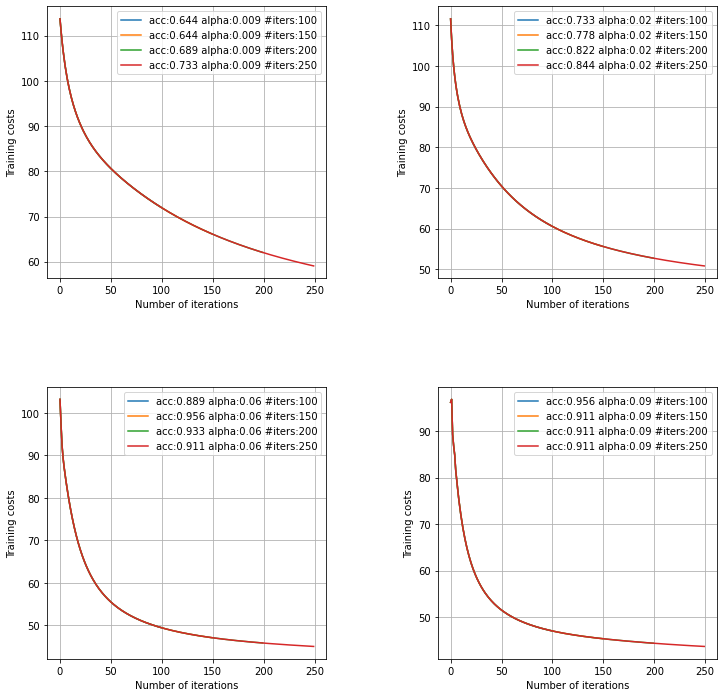

In [21]:
def test_function(X, y, theta):
    Xmat = X.to_numpy()
    y = y.to_numpy()
    a = Xmat @ theta.T
    phi = np.exp(a)
    phi_n = phi/(np.sum(phi, axis = 1)).reshape(-1,1)
    yhat = np.argmax(phi_n, axis = 1)
    
    num_correct_pred = (y == yhat).astype(int).sum()
    m_test = len(y)
    accuracy = num_correct_pred / m_test
    
    return accuracy, yhat

theta_arr = []
cost_arr = []
accuracy_arr = []

# design your own learning rate and num iterations
alpha_arr = np.array([0.009, 0.02, 0.06, 0.09])
iterations_arr = np.array([100, 150, 200, 250])

# YOUR CODE HERE
num_class = 3

fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for count, alpha in enumerate(alpha_arr):
    ax = fig.add_subplot(2, 2, count+1)
    for iterations in iterations_arr:
        theta_initial = np.ones((3, n))
        theta, cost = my_gradient_descent(X_train, y_train, theta_initial, alpha, iterations, num_class)
        accuracy,_ = test_function(X_test, y_test, theta)
        ax.plot(np.arange(iterations), cost, label='acc:'+str(np.round(accuracy, 3))+' alpha:'+str(alpha) + ' #iters:'+str(iterations))
        theta_arr.append(theta)
        accuracy_arr.append(accuracy)
        cost_arr.append(cost)
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Training costs')
    ax.legend()
    ax.grid('on')

plt.show()


#### Choosing the best value of learning rate and iterations
Note: In the above plot, I plot graph in separate figure for different alphas, while on same graph for different iterations but same alpha value. Hence, it seems to be single plot but there are four plot of four colors as shown in the legend. It's because they are overlapped with each other.

From the above plot we can see that for learning rate of 0.06, at iterations around 150, we get this maximum accuracy of around 0.956, which is pretty good, and then as we can see the accuracy starts to decline with the increase in the number of iterations. Hence, I choose learning rate to be 0.06, iterating around 150 to get the highest accuracy amount different iterations and different learning rates.

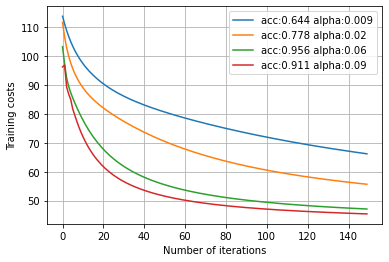

In [22]:

iterations = 150
fig = plt.figure()
for alpha in alpha_arr:
    theta_initial = np.ones((3, n))
    theta, cost = my_gradient_descent(X_train, y_train, theta_initial, alpha, iterations, num_class)
    accuracy,_ = test_function(X_test, y_test, theta)
    plt.plot(np.arange(iterations), cost, label='acc:'+str(np.round(accuracy, 3))+' alpha:'+str(alpha))
    
plt.xlabel('Number of iterations')
plt.ylabel('Training costs')
plt.legend()
plt.grid('on')
plt.show()


**Expected result**: <span style="color:blue">(*Yours doesn't have to be the same!*)</span>

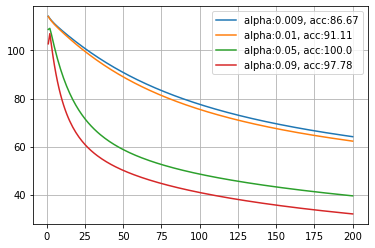

### **Scatter Plot**

Make 2D scatter plots showing the predicted and actual class of each item in the test set, plotting two features at a time. Comment on the cause of the errors you observe. If you obtain perfect test set accuracy, re-run the train/test split and rerun the optimization until you observe some mistaken predictions on the test set.

In [23]:
#for the sake of more error values we can take less accurate model as well
theta = theta_arr[9]
accuracy, y_pred = test_function(X_test, y_test, theta)
y = y_test.to_numpy()
correct_pred = (y == y_pred)
incorrect_pred = (y != y_pred)

In [24]:
X_test.shape
X_test.columns.to_numpy()
X_incorrect = X_test[incorrect_pred]
X_incorrect.shape

y_xpred_c = y_pred[incorrect_pred]
y_xpred_c
# print(y_test, y_pred)

array([2, 2])

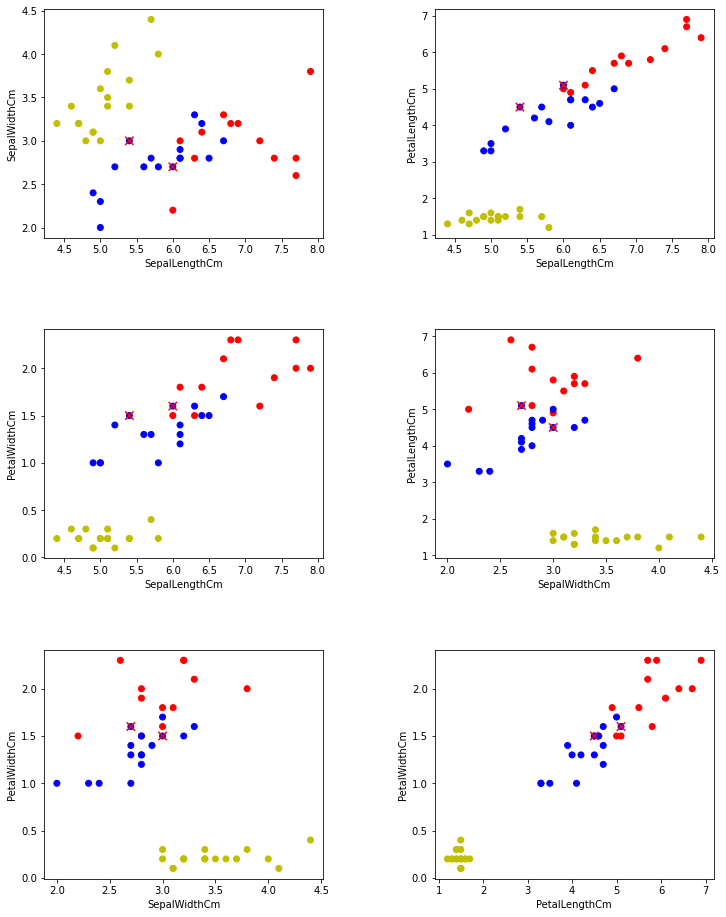

In [25]:
fig = plt.figure(figsize=(12, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
X = X_test.to_numpy()
columns = X_test.columns.to_numpy()

ytest_color = y_test.replace(to_replace = [0,1,2], value=['y','b','r']).to_numpy()

ypred_series = pd.Series(y_pred)
ypred_c = ypred_series.replace(to_replace = [0,1,2], value=['y','b','r']).to_numpy()
y_xpred_c = ypred_c[incorrect_pred]

X_in = X_test[incorrect_pred].to_numpy()  #incorrect predicted X values

count = 0
for i in range(1,4):
    for j in range(i+1, 5):
        ax = fig.add_subplot(3, 2, count+1)
        ax.scatter(X[:,i], X[:,j], c = ytest_color)
        ax.scatter(X_in[:,i], X_in[:,j], c = y_xpred_c, marker = 'x', s = 70, linewidths =0.1)
        ax.set_xlabel(columns[i])
        ax.set_ylabel(columns[j])
        count += 1



### **Discussion**
Above plot show the scatter plot of three species of Iris flower represented by three different colors. These filled cirlce represents the truth value. And the cross scatter plot in the figure shows wrong output predicted by our model. The color of the cross represents the class that is predicted by our model while the actual class is show by the color on which it is drawn upon.

In the plot, its clear that the yellow color (one of the three species) is easily separable, while the blue and the red one's boundary are overlapped with each other. Even looking at that scatter plot, we are unable to separate the two species. That's where our model failed to distinguish that two species of Iris flower. These red and blue color representing the two species does not seem to be separable by a straight line, hence it is okay and reasonable that our model failed to distinguish that.

## On your own to take home

We see that the Iris dataset is pretty easy. Depending on the train/test split, we get 97-100% accuracy.

Find a more interesting multi-class classification problem on Kaggle (Tell the reference), clean the dataset to obtain numerical input features without missing values,
split the data into test and train, and experiment with multinomial logistic regression.

Write a brief report on your experiments and results. As always, turn in a Jupyter notebook by email
to the instructor and TA.


In [26]:
### Classifications of Beans

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [28]:
data_bean = pd.read_excel('Dry_Bean_Dataset.xlsx')
data_bean.shape

(13611, 17)

In [29]:
data_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [30]:
data_bean.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [31]:
data_bean.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [32]:
#separating independent columns and dependent column in X and y and normalizing them
X_data = data_bean.drop(columns = 'Class')
y_data = data_bean['Class']


In [33]:
print(X_data.head())
print(y_data.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913358      0.007332      0.0

In [34]:
X_norm = (X_data - X_data.min()) / (X_data.max() - X_data.min())

In [35]:
X_norm.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967315,0.884987,0.974979
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116


In [36]:
X_data.shape

(13611, 16)

In [37]:
def partition(X, y, percent_train):
    y_labels_name = None
    y_labels_new = None
    
    # YOUR CODE HERE
    
    y_labels_name = y.unique()
#     y_labels_new = [str(i) for i in range(len(y_labels_name))]
    y_labels_new = list(np.arange(len(y_labels_name)))
    
    yy = y.replace(to_replace = y_labels_name, value = y_labels_new, inplace = False)
    
    random.seed(32)
    idx = np.arange(0, X.shape[0])
    random.shuffle(idx)
    train_size = int(len(idx)*percent_train)
    idx_train = idx[0:train_size]
    idx_test = idx[train_size:]
    X_train = X.iloc[idx_train, :].reset_index(drop=True)
    X_test = X.iloc[idx_test, :].reset_index(drop=True)
    y_train = yy.iloc[idx_train].reset_index(drop=True)
    y_test = yy.iloc[idx_test].reset_index(drop=True)
    
    return idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new

In [38]:
idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new = partition(X_norm, y_data, 0.85)

In [39]:
print('X_train shape:', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape: (11569, 16)
y_train shape (11569,)
X_test shape: (2042, 16)
y_test shape (2042,)


In [40]:
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.096133,0.161842,0.166574,0.225995,0.258806,0.685760,0.093426,0.177792,0.807980,0.944250,0.881509,0.594881,0.476027,0.475958,0.543550,0.924717
1,0.118051,0.182508,0.158391,0.305825,0.126523,0.486109,0.114265,0.211070,0.574750,0.978806,0.947998,0.780001,0.374211,0.592209,0.743452,0.970313
2,0.070061,0.128344,0.154897,0.153134,0.371855,0.785894,0.068234,0.135494,0.530056,0.925301,0.843763,0.468948,0.592032,0.424094,0.415905,0.971792
3,0.070228,0.135708,0.163308,0.144873,0.409154,0.811073,0.068531,0.135775,0.516435,0.913855,0.791850,0.430712,0.607532,0.394272,0.378487,0.972299
4,0.195657,0.339071,0.421119,0.238097,0.734510,0.945815,0.190983,0.316499,0.196158,0.918231,0.619655,0.159051,0.459211,0.111758,0.130562,0.923266


In [41]:
y_train.head()

0    5
1    0
2    6
3    6
4    4
Name: Class, dtype: int64

In [42]:
print('Original Label:', y_data.unique())

Original Label: ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [43]:
def my_J(theta, X, y, j, num_class):
    #computing J for a particular class only, here class is j, if j=0, then for class y=0, j=1, then for class y=1
    #cost of a class i is cumulated only if the train set is of the same class j, otherwise it's just ignored, mathematically-delta(y,j)-does this filtering
    cost = None
    delta_j = (y == j).astype(int) #shape of y (m,)
#     print('delta shape',delta_j.shape)
    phi_j = np.squeeze(np.exp(X @ theta[j,:].reshape(-1,1))) / np.sum(np.exp(X @ theta.reshape(-1,num_class)), axis=1) #shape of (m,)
#     print('phi shape',phi_j.shape)
    cost_j = - np.dot(delta_j, np.log(phi_j)) #scalar
    cost = cost_j
#     print(delta_j)
    return cost

In [44]:
def my_grad_cost(X, y, j, theta, num_class):
    #grad_cost for a particular class j, here class is represented by j
    #theta[j]= shape(n,)
    grad = None
    cost = None
    # YOUR CODE HERE
    cost = my_J(theta, X, y, j, num_class)
    
    delta_j = (y == j).astype(int)
#     print('delta',delta_j.shape)
    phi_j = np.squeeze(np.exp(X @ theta[j].reshape(-1,1))) / np.sum(np.exp(X @ theta.reshape(-1,num_class)), axis=1) #shape of (m,)
#     print('phi_j\n', max(phi_j))
#     print((phi_j - delta_j))
    grad = (phi_j - delta_j) @ X / X.shape[0]  # ycalculated - y_truth, and its averaged over training size
#     print(grad.shape)
    return grad, cost

In [45]:
def my_gradient_descent(X, y, theta, alpha, iters, num_class):        
    cost_arr = []
    # YOUR CODE HERE
    for i in range(iters):
        cum_cost = 0
        for j in range(num_class):
            grad, cost = my_grad_cost(X, y, j, theta, num_class)
            theta[j] = theta[j] - alpha * grad
            cum_cost += cost
        cost_arr.append(cum_cost)
    return theta, cost_arr

In [46]:
def test_function(X, y, theta):
    Xmat = X.to_numpy()
    y = y.to_numpy()
    a = Xmat @ theta.T
    phi = np.exp(a)
    phi_n = phi/(np.sum(phi, axis = 1)).reshape(-1,1)
    yhat = np.argmax(phi_n, axis = 1)
    
    num_correct_pred = (y == yhat).astype(int).sum()
    m_test = len(y)
    accuracy = num_correct_pred / m_test
    
    return accuracy, yhat
    

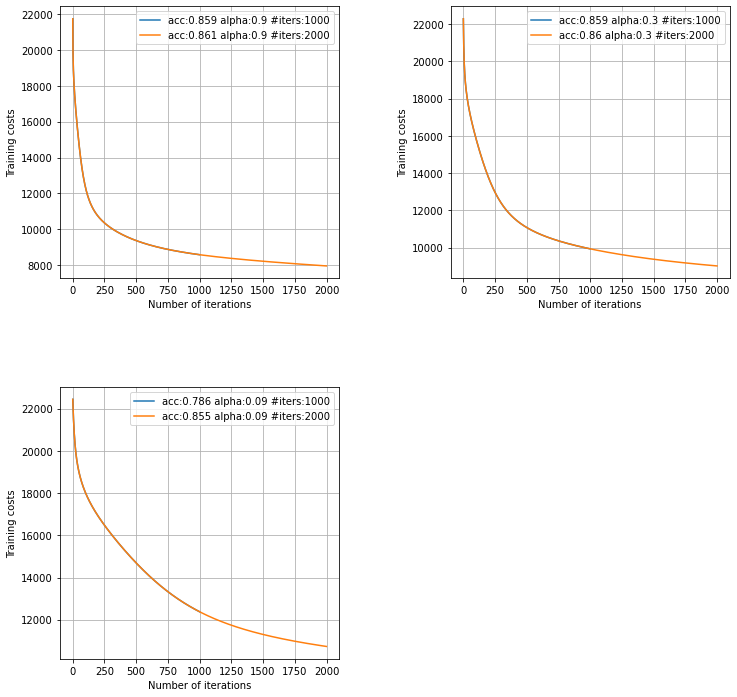

In [47]:
#training
if (X_train.shape[1] == X_data.shape[1]): 
    X_train.insert(0, "intercept", 1)
    
if (X_test.shape[1] == X_data.shape[1]): 
    X_test.insert(0, "intercept", 1)

theta_arr = []
cost_arr = []
accuracy_arr = []

alpha_arr = np.array([0.9, 0.3, 0.09])
iterations_arr = np.array([1000, 2000])

m,n = X_train.shape

num_class = len(y_data.unique())

fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for count, alpha in enumerate(alpha_arr):
    ax = fig.add_subplot(2, 2, count+1)
    for iterations in iterations_arr:
        theta_initial = np.ones((num_class, n))
        theta, cost = my_gradient_descent(X_train, y_train, theta_initial, alpha, iterations, num_class)
        accuracy,_ = test_function(X_test, y_test, theta)
        ax.plot(np.arange(iterations), cost, label='acc:'+str(np.round(accuracy, 3))+' alpha:'+str(alpha) + ' #iters:'+str(iterations))
        theta_arr.append(theta)
        accuracy_arr.append(accuracy)
        cost_arr.append(cost)
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Training costs')
    ax.legend()
    ax.grid('on')

plt.show()

Since, from the above learning curve with different learning rate and iterations along with the accuracy shows that the accuracy level almost flattens with the increase in learning rate at 2000 iterations. I can choose alpha = 0.9 or 0.3 as a learning rate for my model to train.

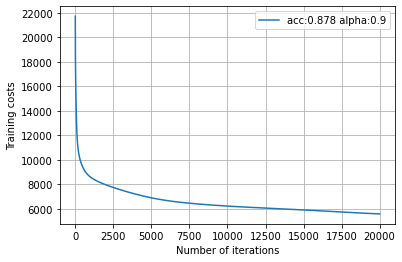

In [48]:
alpha_arr = [0.9]
iterations = 20000
fig = plt.figure()
for alpha in alpha_arr:
    theta_initial = np.ones((num_class, n))
    theta, cost = my_gradient_descent(X_train, y_train, theta_initial, alpha, iterations, num_class)
    accuracy,_ = test_function(X_test, y_test, theta)
    plt.plot(np.arange(iterations), cost, label='acc:'+str(np.round(accuracy, 3))+' alpha:'+str(alpha))
    
plt.xlabel('Number of iterations')
plt.ylabel('Training costs')
plt.legend()
plt.grid('on')
plt.show()

In [49]:
print(theta)

[[-21.94401415 -11.72758441 -13.54466619 -12.4580399  -14.00785349
  -11.97211167  -5.24368028 -11.5938625  -12.76588262 -14.37383346
  -11.27502445 -11.83436148  -8.15371826 -14.74936932  -8.69483186
   -8.76973637  -6.53280033]
 [-13.7733408  -17.37201065 -11.84733085 -11.71115834 -12.23734478
   -7.05108314  -1.41310984 -17.08474549 -11.43247576 -12.27242159
  -14.52134176 -22.08287538  -9.32016498 -16.99734034 -18.17265683
  -10.62744617  -1.88952871]
 [-20.31651875  -8.25210125  -7.91860449  -6.5856997   -8.51718509
   -4.98564445 -12.52043887  -8.34494253  -7.14982753 -16.08089019
  -12.5600563  -11.81529764 -11.64602434  -8.66261957  -8.45398307
  -10.81648825 -14.00837387]
 [-13.52271089 -22.02358437 -11.57179737  -8.41950813 -13.65584072
   -5.43110831   0.3168059  -21.66970444 -10.46450088 -12.780027
   -7.76224407  -5.2115048  -13.69410531 -25.59596698 -20.82308163
  -15.14290531 -15.11467077]
 [-15.47978429 -12.12983983 -12.50845419 -12.65529385 -14.19117212
   -6.77995886 

In [50]:
# theta = theta_arr[1]
accuracy, y_pred = test_function(X_test, y_test, theta)
y = y_test.to_numpy()
correct_pred = (y == y_pred)
incorrect_pred = (y != y_pred)

In [55]:
X_test.shape
X_test.columns.to_numpy()
X_incorrect = X_test[incorrect_pred]
X_incorrect.shape

y_xpred_c = y_pred[incorrect_pred]
# y_xpred_c
# print(y_test, y_pred)

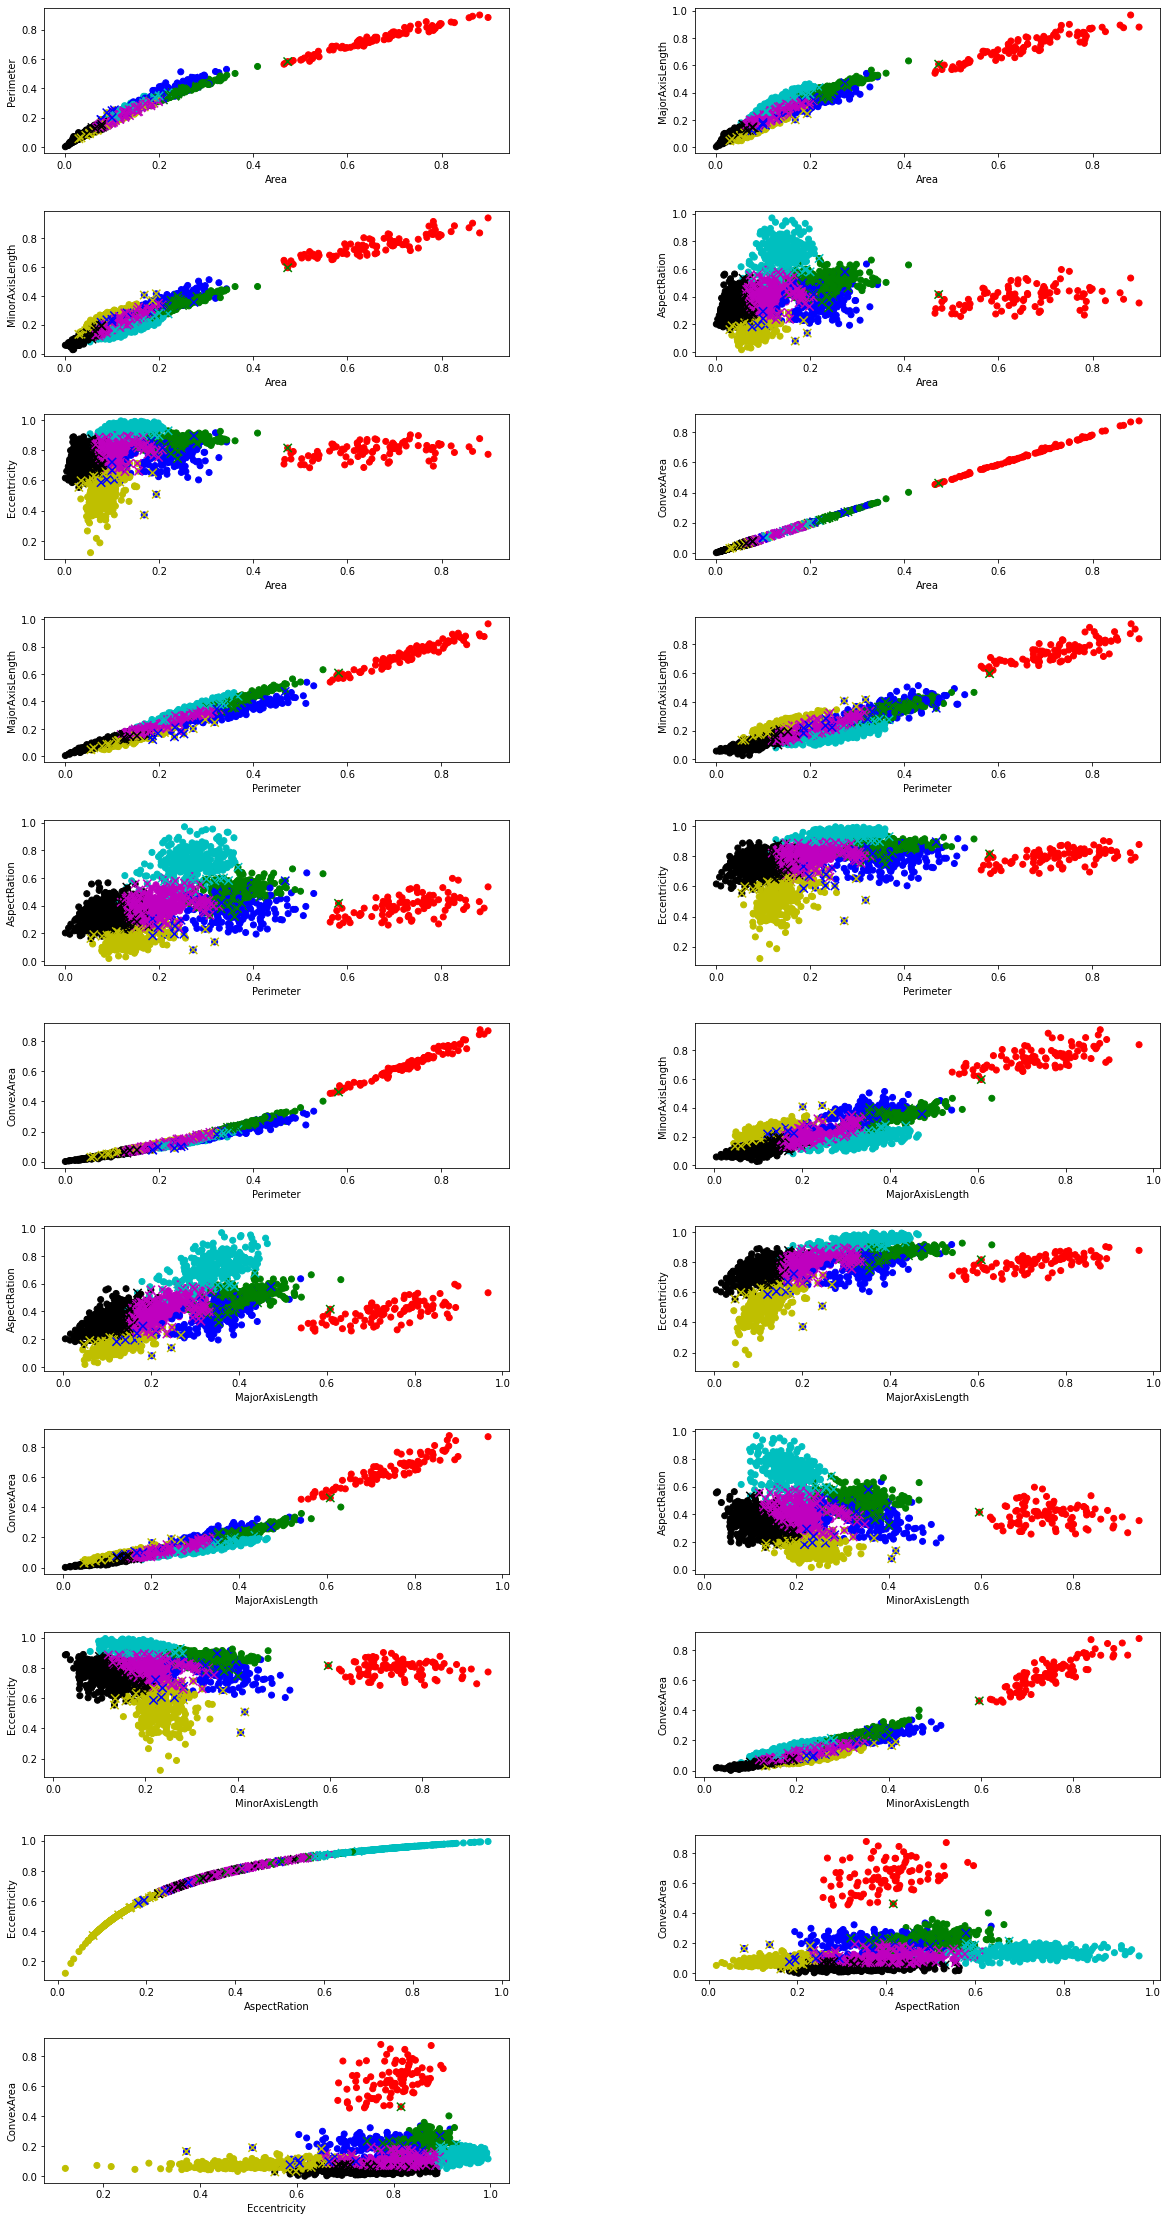

In [52]:
fig = plt.figure(figsize=(20, 40))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
X = X_test.to_numpy()
columns = X_test.columns.to_numpy()

ytest_color = y_test.replace(to_replace = [0,1,2,3,4,5,6], value=['y','b','r','g', 'c','m','k']).to_numpy()

ypred_series = pd.Series(y_pred)
ypred_c = ypred_series.replace(to_replace = [0,1,2,3,4,5,6], value=['y','b','r','g', 'c','m','k']).to_numpy()
y_xpred_c = ypred_c[incorrect_pred]

X_in = X_test[incorrect_pred].to_numpy()  #incorrect predicted X values

count = 0
for i in range(1,num_class):
    for j in range(i+1, num_class+1):
        ax = fig.add_subplot(11, 2, count+1)
        ax.scatter(X[:,i], X[:,j], c = ytest_color)
        ax.scatter(X_in[:,i], X_in[:,j], c = y_xpred_c, marker = 'x', s = 70, linewidths =0.1)
        ax.set_xlabel(columns[i])
        ax.set_ylabel(columns[j])
        count += 1
plt.show()

### **Discussions**

**About the Datasets**


*Source:
Murat KOKLU
Faculty of Technology,
Selcuk University,
TURKEY.
ORCID : 0000-0002-2737-2360
mkoklu@selcuk.edu.tr*

*Ilker Ali OZKAN
Faculty of Technology,
Selcuk University,
TURKEY.
ORCID : 0000-0002-5715-1040
ilkerozkan@selcuk.edu.tr*


Our datasets is made from the high resolution images of 13,611 grains of seven dry bean. These beans images were then segmented and their features were extracted. This datasets contains 16 independent features, of which 12 are about the beans dimensions and 4 of them are about their shapes. Here I am trying to implement this problem using the multinomial logistic regression model to distinguish the beans (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)
To implement this problem practically we may have to implement Computer Vision system in order to take the images of the beans and then these images taken by the CVS should be segmented to extract these 16 features required by our multinomial logistic regression model in order to classify the beans.

**Preprocessing of Datasets**

Luckily, this dataset is in clean form. There is not a single N/A element in this dataset. So, I do not have to perform the fill operations. Next, again luckily, the independent features of our datasets is of either integer or float data types, which makes the preprocessing life much easier. But the dependent features is of object type (string or categorical). This needs to be converted to the integer starting from 0 to num_class (this includes the x0). This is just because it is little bit easier to map this integer class with the location of highest probability value of output y. I think we can perform without changing such categorical values to the integer.

So, only preprocessing that's needed to perform for this datasets is normalization. The data of each features are of different ranges and that difference is high. So normalization would help to treat each features equally while training. It means that if the feature value is too high then the learning parameter associated with it will be too smaller because the error associated with it will be too high.


**Preparing Training and Test sets**

The total number of examples in our datasets is almost 12,000. Since the datasets is bigger, I partitioned this datasets to training and test sets with percentage of train equal to 85. So the total tests examples is around 2,000. I think this will be enough to test our model.

**Model**

Our model to perform Multiclass Classification is Multinomial Logistic Regression model, which is basically a simple logistic regression model implemented for each classes separately (separate independent thetas for each class). It means if the class of a training sample is A, then this training sample should output 1 to that particular class and 0 for remaining classes, and likewise for each class.

The following output shows that Original label with their respective colors and integer labels.

Original Label ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']

New Label [0, 1, 2, 3, 4, 5, 6]

Color representing class - 'y','b','r','g', 'c','m','k'

In [53]:
print('Original Label',y_labels_name)
print('New Label',y_labels_new)
print("Color representing class - 'y','b','r','g', 'c','m','k'")

Original Label ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
New Label [0, 1, 2, 3, 4, 5, 6]
Color representing class - 'y','b','r','g', 'c','m','k'


**Experiments and Results**

For the learning rate, I trained the model at different learning rate at different number of iteration, and checked which of them converger the model faster with better test accuracy. Since, from the above learning curve with different learning rate and iterations along with the accuracy shows that the accuracy level almost flattens with the increase in learning rate at 2000 iterations. I can choose alpha = 0.9 or 0.3 as a learning rate for my model to train.

In the test sets, we can see that the class represented by the red color seems separable with 100% accuracy. When I trained my model upto 2,000 iterations with accuracy of 0.861, I found that the handful of red color class is misclassified by the model, which seems weird, because that shouldn't be the case as we can clearly see from the plot that a linear boundary can easily separate that class from the rest of the group, except in one plot of AspectRatio vs Eccentricity. This showed that the model needs to be trained for more number of iterations. Then I increased the number of iterations to be 20,000, ten times higher than the previous one, with accuracy of 0.878. The difference of accuracy level for 2000 iterations and 20,000 iterations doesn't seems much, but the later one actually separates the red class pretty well with the very minimum classification error.

From the scatter plot, we can see that all the classes except the red ones are closed to each other sharing the common boudary and sometimes overlapping boundary as well. So, obviously our model will misclassifies the test examples that are close to the boudary and the outliers.

The scatter plot shows the test examples plot with different color representing different classes. The cross marker plot represents the error made by the model in predicting the class and the marker color itself represents the class that is predicted by the model.


The following outputs shows the percentage accuracy of each class. From that we can see that the class BOMBAY has the maximum accuracy of around 99%, and this class is represented by the color RED in the above scatter plot. And the minimum accuracy is of class BARBUNYA and DERMASON which are represented by color BLUE and BLACK respectively.

In [54]:
#percentage error for each class
eachclass_count = y_test.value_counts()
correct_count_arr = []
for each_class in range(0,num_class):
    correct = ((y_test == each_class) & (y_pred == each_class)).sum()
    print(f"Percentage accuracy of class {y_labels_name[each_class]} is: {correct/eachclass_count[each_class]*100}")


Percentage accuracy of class SEKER is: 88.95899053627761
Percentage accuracy of class BARBUNYA is: 83.98058252427184
Percentage accuracy of class BOMBAY is: 98.9795918367347
Percentage accuracy of class CALI is: 87.5
Percentage accuracy of class HOROZ is: 92.64705882352942
Percentage accuracy of class SIRA is: 87.77173913043478
Percentage accuracy of class DERMASON is: 84.05253283302065


From the research paper from science direct https://www.sciencedirect.com/science/article/abs/pii/S0168169919311573?via%3Dihub, we can see the following statements about the model they used get highest accuracy, and the accuracy of that model for each classes.

*The SVM classification model, which has the highest accuracy results, has classified the Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira bean varieties with 92.36%, 100.00%, 95.03%, 94.36%, 94.92%, 94.67% and 86.84%, respectively.*

And ours is:

The Multinomial Logistic regression has classified the Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira bean varieties with 83.98%, 98.98%, 87.5%, 84.05%, 92.64%, 88.96% and 87.77%, respectively. Of course, the my training percent of the data may be different than the above mentioned paper.

**Conclusion**

In this way, the Multinomial Logistic Regression model is trained in the datasets to get the accuracy of 87.8% in 15% of the testsets.